In [220]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error

In [221]:
# !pip install pmdarima

In [222]:
data = pd.read_csv("in.csv")

In [223]:
size = int(len(data) * 0.66)
train, test = data[0:size], data[size:len(data)]

In [224]:
print(train.head(10))

     Month  Sales(USD)
0  2021-01       266.0
1  2021-02       145.9
2  2021-03       183.1
3  2021-04       119.3
4  2021-05       180.3
5  2021-06       168.5
6  2021-07       231.8
7  2021-08       224.5
8  2021-09       192.8
9  2021-10       122.9


In [225]:
df=data
df.head(10)

,Month,Sales(USD)
0,2021-01,266.0
1,2021-02,145.9
2,2021-03,183.1
3,2021-04,119.3
4,2021-05,180.3
5,2021-06,168.5
6,2021-07,231.8
7,2021-08,224.5
8,2021-09,192.8
9,2021-10,122.9


In [226]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
print(data)

            Sales(USD)
Month                 
2021-01-01       266.0
2021-02-01       145.9
2021-03-01       183.1
2021-04-01       119.3
2021-05-01       180.3
2021-06-01       168.5
2021-07-01       231.8
2021-08-01       224.5
2021-09-01       192.8
2021-10-01       122.9
2021-11-01       336.5
2021-12-01       185.9
2022-01-01       194.3
2022-02-01       149.5
2022-03-01       210.1
2022-04-01       273.3
2022-05-01       191.4
2022-06-01       287.0
2022-07-01       226.0
2022-08-01       303.6
2022-09-01       289.9
2022-10-01       421.6
2022-11-01       264.5
2022-12-01       342.3
2023-01-01       339.7
2023-02-01       440.4
2023-03-01       315.9
2023-04-01       439.3
2023-05-01       401.3
2023-06-01       437.4
2023-07-01       575.5
2023-08-01       407.6
2023-09-01       682.0
2023-10-01       475.3
2023-11-01       581.3
2023-12-01       646.9


<Axes: xlabel='Month'>

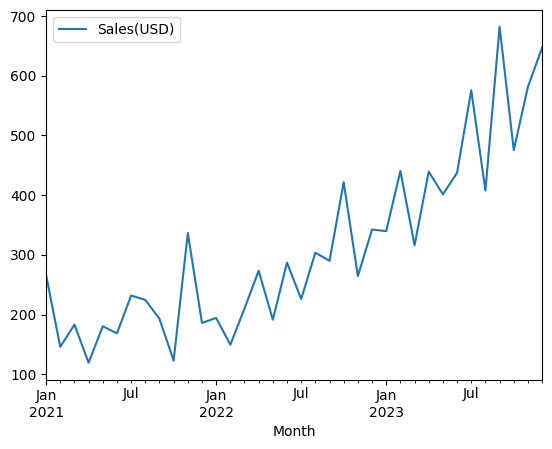

In [227]:
df.plot()

In [228]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [229]:
df['first_diff']=df-df.shift(1)

In [230]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)


In [231]:
adf_test(df['Sales(USD)'])

1. ADF :  3.060142083641181
2. P-Value :  1.0
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 25
5. Critical Values :
	 1% :  -3.7238633119999998
	 5% :  -2.98648896
	 10% :  -2.6328004


In [232]:
adf_test(df['first_diff'].dropna())

1. ADF :  -7.249074055553854
2. P-Value :  1.7998574141687034e-10
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 33
5. Critical Values :
	 1% :  -3.6461350877925254
	 5% :  -2.954126991123355
	 10% :  -2.6159676124885216


In [233]:
from statsmodels.graphics.tsaplots import acf, pacf
lag_acf = acf(df['first_diff'].dropna())
lag_pacf = pacf(df['first_diff'].dropna())

Text(0.5, 1.0, 'Autocorrelation Function')

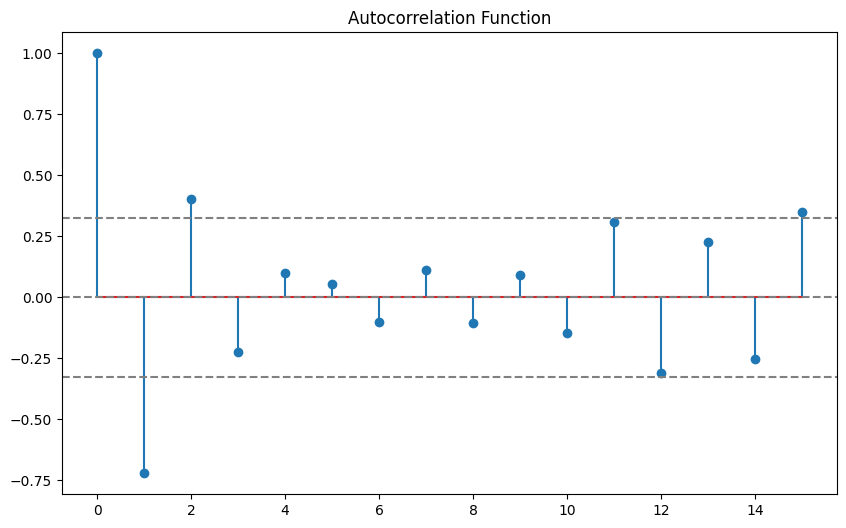

In [234]:
plt.figure(figsize=(10, 6))
plt.stem(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

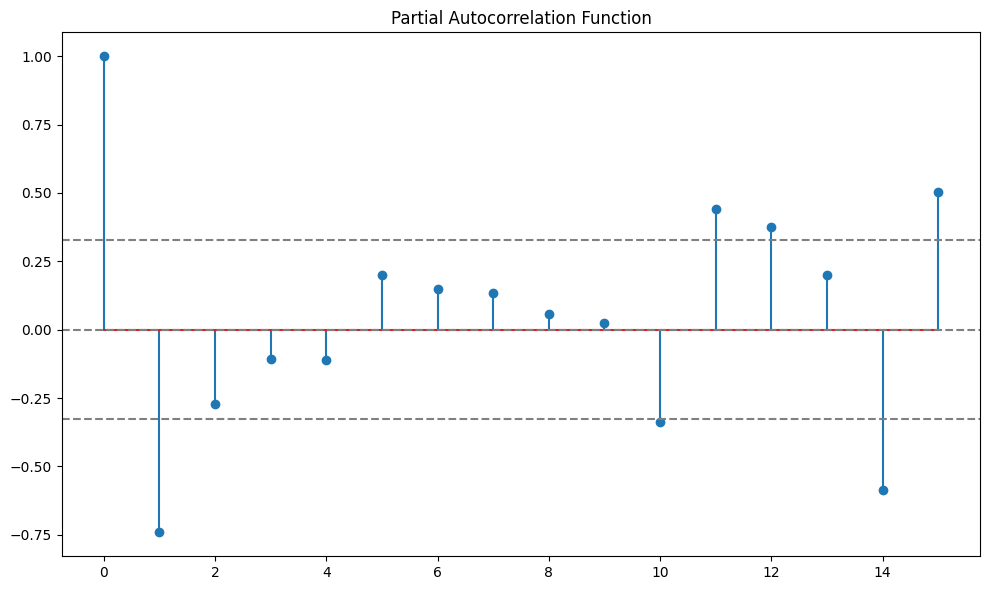

In [235]:
plt.figure(figsize=(10, 6))
plt.stem(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [236]:
size=int(len(df)*0.66)
train=df[:size]
test=df[size:]

In [237]:
auto_arima(df['first_diff'].dropna(),  trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=406.022, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=409.013, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=429.229, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=403.628, Time=0.27 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=404.692, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=404.286, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=402.467, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=401.528, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best 

ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True)

In [238]:
model=ARIMA(train['first_diff'],order=(1, 0, 2))
trained_model=model.fit()
trained_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             first_diff   No. Observations:                   23
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -121.724
Date:                Thu, 25 Jan 2024   AIC                            253.447
Time:                        05:14:23   BIC                            259.125
Sample:                    01-01-2021   HQIC                           254.875
                         - 11-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4461      3.020      2.134      0.033       0.526      12.366
ar.L1         -0.8589      0.348     -2.471      0.013      -1.540      -0.178
ma.L1         -0.3402    136.224     -0.002      0.998    -267.334     266.653
ma.L2         -0.6594     89.716     -0.007      0.994    -176.500     175.181
sigma2      3180.4694   4.32e+05      0.007      0.994   -8.43e+05     8.5e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 1.97
Prob(Q):                              0.63   Prob(JB):                         0.37
Heteroskedasticity (H):               1.67   Skew:                             0.71
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [239]:
df['pred']=trained_model.predict(start=len(train),end=len(df)-1)

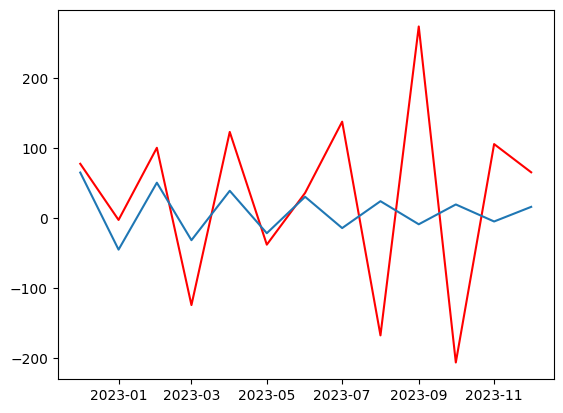

In [240]:
plt.plot(test['first_diff'],color='red')
plt.plot(df['pred'])

In [241]:
rms = np.sqrt(mean_squared_error(test['first_diff'], df['pred'].dropna()))
rms

132.07229861435948

In [242]:
df = df.dropna()
df.head()

,Sales(USD),first_diff,pred
Month,,,
2022-12-01,342.3,77.8,65.253416
2023-01-01,339.7,-2.6,-45.110493
2023-02-01,440.4,100.7,50.728229
2023-03-01,315.9,-124.5,-31.587962
2023-04-01,439.3,123.4,39.113683


In [243]:
df['predict']=df['Sales(USD)']+df['pred']

<ipython-input-243-59bd8b87430a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predict']=df['Sales(USD)']+df['pred']


In [244]:
df.tail(14)

,Sales(USD),first_diff,pred,predict
Month,,,,
2022-12-01,342.3,77.8,65.253416,407.553416
2023-01-01,339.7,-2.6,-45.110493,294.589507
2023-02-01,440.4,100.7,50.728229,491.128229
2023-03-01,315.9,-124.5,-31.587962,284.312038
2023-04-01,439.3,123.4,39.113683,478.413683
2023-05-01,401.3,-38.0,-21.612191,379.687809
2023-06-01,437.4,36.1,30.545460,467.945460
2023-07-01,575.5,138.1,-14.252916,561.247084
2023-08-01,407.6,-167.9,24.224555,431.824555


In [245]:
rms = np.sqrt(mean_squared_error(df['predict'].dropna(), test['Sales(USD)']))
rms

33.198381966654296

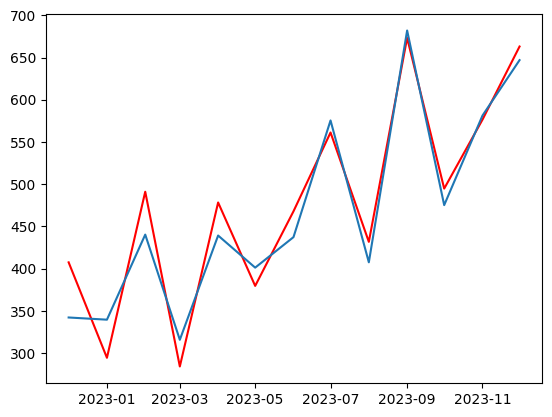

In [246]:
plt.plot(df['predict'], color='red')
plt.plot(test['Sales(USD)'])

In [247]:
# df.plot()

In [248]:
future_steps = 24  # Example value, adjust based on the forecasting horizon
forecast = trained_model.forecast(steps=future_steps, alpha=0.05)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [249]:
# #forecast
# forecast_test = trained_model.forecast(len(test))
# forecast_test

In [250]:
forecast

2022-12-01    65.253416
2023-01-01   -45.110493
2023-02-01    50.728229
2023-03-01   -31.587962
2023-04-01    39.113683
2023-05-01   -21.612191
2023-06-01    30.545460
2023-07-01   -14.252916
2023-08-01    24.224555
2023-09-01    -8.823871
2023-10-01    19.561530
2023-11-01    -4.818783
2023-12-01    16.121548
2024-01-01    -1.864171
2024-02-01    13.583822
2024-03-01     0.315491
2024-04-01    11.711703
2024-05-01     1.923459
2024-06-01    10.330614
2024-07-01     3.109681
2024-08-01     9.311764
2024-09-01     3.984775
2024-10-01     8.560143
2024-11-01     4.630344
Freq: MS, Name: predicted_mean, dtype: float64

In [251]:
# type(forecast_test)

In [252]:
# adjusted_forecast = forecast + df['Sales(USD)']

In [253]:
# adjusted_forecast

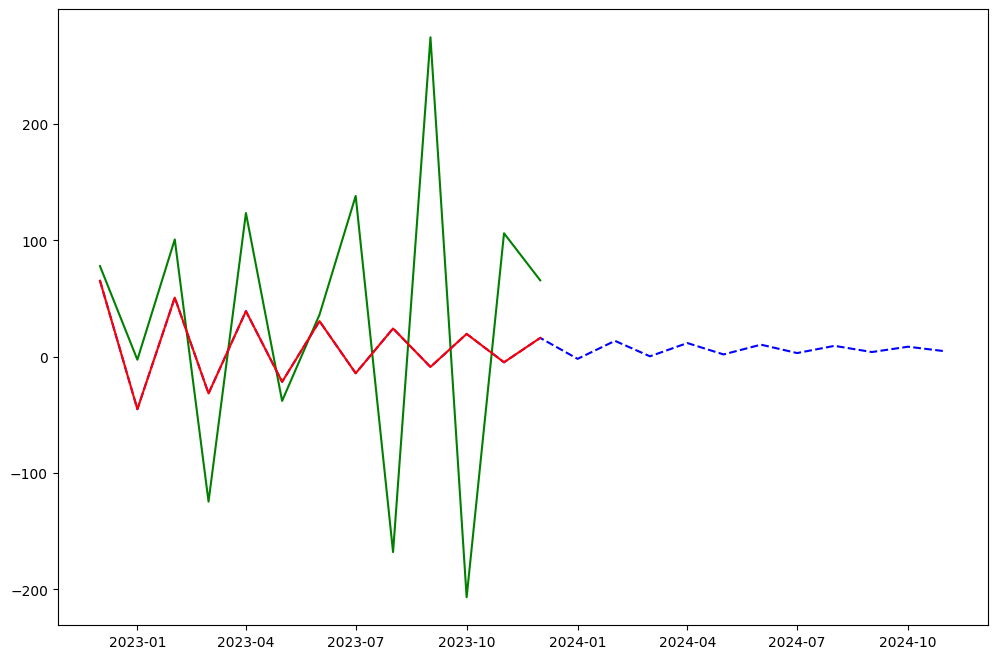

In [254]:
plt.figure(figsize=(12, 8))
plt.plot(test['first_diff'], color='green')
plt.plot(forecast, color='blue', linestyle='dashed')
plt.plot(df['pred'], color='red')
# plt.plot(pd.date_range(start=test.index[-1], periods=future_steps+1, freq='M')[1:], forecast[''], label='Forecast', linestyle='dashed', color='green')

In [255]:
adjusted_forecast = forecast
print(adjusted_forecast)

2022-12-01    65.253416
2023-01-01   -45.110493
2023-02-01    50.728229
2023-03-01   -31.587962
2023-04-01    39.113683
2023-05-01   -21.612191
2023-06-01    30.545460
2023-07-01   -14.252916
2023-08-01    24.224555
2023-09-01    -8.823871
2023-10-01    19.561530
2023-11-01    -4.818783
2023-12-01    16.121548
2024-01-01    -1.864171
2024-02-01    13.583822
2024-03-01     0.315491
2024-04-01    11.711703
2024-05-01     1.923459
2024-06-01    10.330614
2024-07-01     3.109681
2024-08-01     9.311764
2024-09-01     3.984775
2024-10-01     8.560143
2024-11-01     4.630344
Freq: MS, Name: predicted_mean, dtype: float64


In [256]:
# Remove the first 12 rows
adjusted_forecast_trimmed = adjusted_forecast.iloc[12:]

# Print or use adjusted_forecast_trimmed as needed
print(adjusted_forecast_trimmed)

2023-12-01    16.121548
2024-01-01    -1.864171
2024-02-01    13.583822
2024-03-01     0.315491
2024-04-01    11.711703
2024-05-01     1.923459
2024-06-01    10.330614
2024-07-01     3.109681
2024-08-01     9.311764
2024-09-01     3.984775
2024-10-01     8.560143
2024-11-01     4.630344
Freq: MS, Name: predicted_mean, dtype: float64


In [257]:
adjusted_forecast = forecast + df['Sales(USD)'].values

# Print or use adjusted_forecast as needed
print(adjusted_forecast)

ValueError: operands could not be broadcast together with shapes (24,) (13,) 